In [ ]:
#%pip install pandas
#%pip install networkx
#%pip install matplotlib
#%pip install sklearn
#%pip install numpy
#%pip install geopandas

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 1.4 MB/s eta 0:00:12
   - -------------------------------------- 0.8/16.2 MB 1.4 MB/s eta 0:00:11
   -- ------------------------------------- 1.0/16.2 MB 1.4 MB/s eta 0:00:11
   --- ------------------------------------ 1.3/16.2 MB 1.4 MB/s eta 0:00:11
   --- ------------------------------------ 1.6/16.2 MB 1.4 MB/s eta 0:00:11
   ----- ---------------------------------- 2.1/16.2 MB 1.4 MB/s eta 0:00:10
   ----- ---------------------------------- 2.4/16.2 MB 1.4 MB/s eta 0:00:10
   ------ --------------------------------- 2.6/16.2 MB 1.4 MB/s eta 0:00:10
   ------- -------------------------------- 2.9/16.2 MB 1.4 MB/s eta 0:00:10
   ------- -------------------------------- 3.1/16.2 MB 1.4 MB/s eta 0:00:10
   -------- ------------------------------- 3.4/16.2 MB 1.4 MB/s eta 0:00:09
   --------- 

In [53]:
UCL_Finals_1955_2023 = pd.read_csv("C:/Users/Bitterli Christoph/OneDrive/Dokumente/Machine Learning/Projekt/UCL_Finals_1955-2023.csv")

In [54]:
UCL_AllTime_Performance_Table = pd.read_csv("C:/Users/Bitterli Christoph/OneDrive/Dokumente/Machine Learning/Projekt/UCL_AllTime_Performance_Table.csv")

In [55]:
UCL_AllTime_Performance_Table.head()

,#,Team,M.,W,D,L,goals,Dif,Pt.
0,1.0,Real Madrid,486,291,85,110,1076:55:00,533,533
1,2.0,Bayern Munich,388,231,78,79,817:24:00,427,427
2,3.0,FC Barcelona,341,196,77,68,675:51:00,319,319
3,4.0,Manchester United,289,153,69,67,524:56:00,224,224
4,5.0,Juventus,297,151,68,78,472:57:00,171,171


In [56]:
UCL_Finals_1955_2023.head()

,Season,Country,Winners,Score,Runners-up,Country.1,Venue,Attend­ance,Notes
0,1955–56,Spain,Real Madrid,4–3,Reims,France,"Parc des Princes, Paris, France","38,239",NaN
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu, Madrid, Spain","124,000",NaN
2,1957–58,Spain,Real Madrid,3–2,AC Milan,Italy,"Heysel Stadium, Brussels, Belgium","67,000",Match was won during extra time
3,1958–59,Spain,Real Madrid,2–0,Reims,France,"Neckarstadion, Stuttgart, West Germany","72,000",NaN
4,1959–60,Spain,Real Madrid,7–3,Eintracht Frankfurt,West Germany,"Hampden Park, Glasgow, Scotland","127,621",NaN


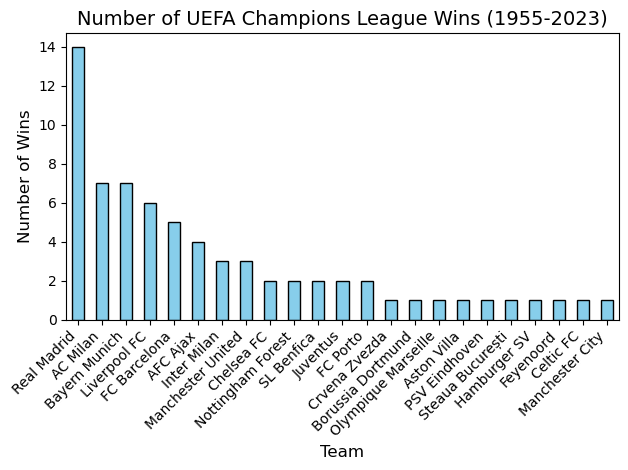

In [57]:
win_counts = UCL_Finals_1955_2023['Winners'].value_counts()
win_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of UEFA Champions League Wins (1955-2023)', fontsize=14)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [58]:
UCL_Finals_1955_2023['Year'] = UCL_Finals_1955_2023['Season'].apply(lambda x: int(x.split("–")[0]) + 1)


In [61]:
UCL_Finals_1955_2023["Attendance"] = UCL_Finals_1955_2023["Attend\xadance"].str.replace(',', '.', regex=False) 
UCL_Finals_1955_2023['Attendance'] = pd.to_numeric(UCL_Finals_1955_2023['Attendance'], errors='coerce')



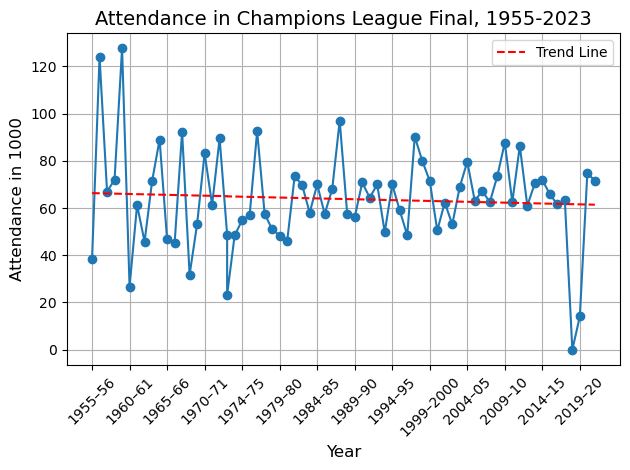

In [69]:
plt.plot(UCL_Finals_1955_2023['Season'], UCL_Finals_1955_2023['Attendance'], marker='o', linestyle='-')
plt.title('Attendance in Champions League Final, 1955-2023', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.xticks(range(0, len(UCL_Finals_1955_2023['Season']), 5), UCL_Finals_1955_2023['Season'][::5], rotation=45)  # Rotate for better readability
plt.ylabel('Attendance in 1000', fontsize=12)
plt.tight_layout()  # Adjust layout to avoid overlap

x = np.arange(len(UCL_Finals_1955_2023['Attendance']))  # x-values for each index in the DataFrame
y = UCL_Finals_1955_2023['Attendance'].values           # y-values from the Attendance column
coefficients = np.polyfit(x, y, 1)    # Fit a 1st-degree polynomial (line)
trendline = np.poly1d(coefficients)   # Create the polynomial function

# Plot the trend line
plt.plot(UCL_Finals_1955_2023['Season'], trendline(x), color='red', linestyle='--', label="Trend Line")

# Add legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.show()

In [ ]:
UCL_Finals_1955_2023['Venue_Last_Character'] = UCL_Finals_1955_2023['Venue'].str.rsplit(',', n=1).str[-1]
venue_character_counts = UCL_Finals_1955_2023['Venue_Last_Character'].value_counts()



Empty DataFrame
Columns: [Season, Country, Winners, Score, Runners-up, Country.1, Venue, Attend­ance, Notes, Year, Attendance, Country_in_Venue, Country_in_Country_Winner, Country_in_Country_Looser, Country_or_Looser_in_Venue, Venue_Last_Character]
Index: []


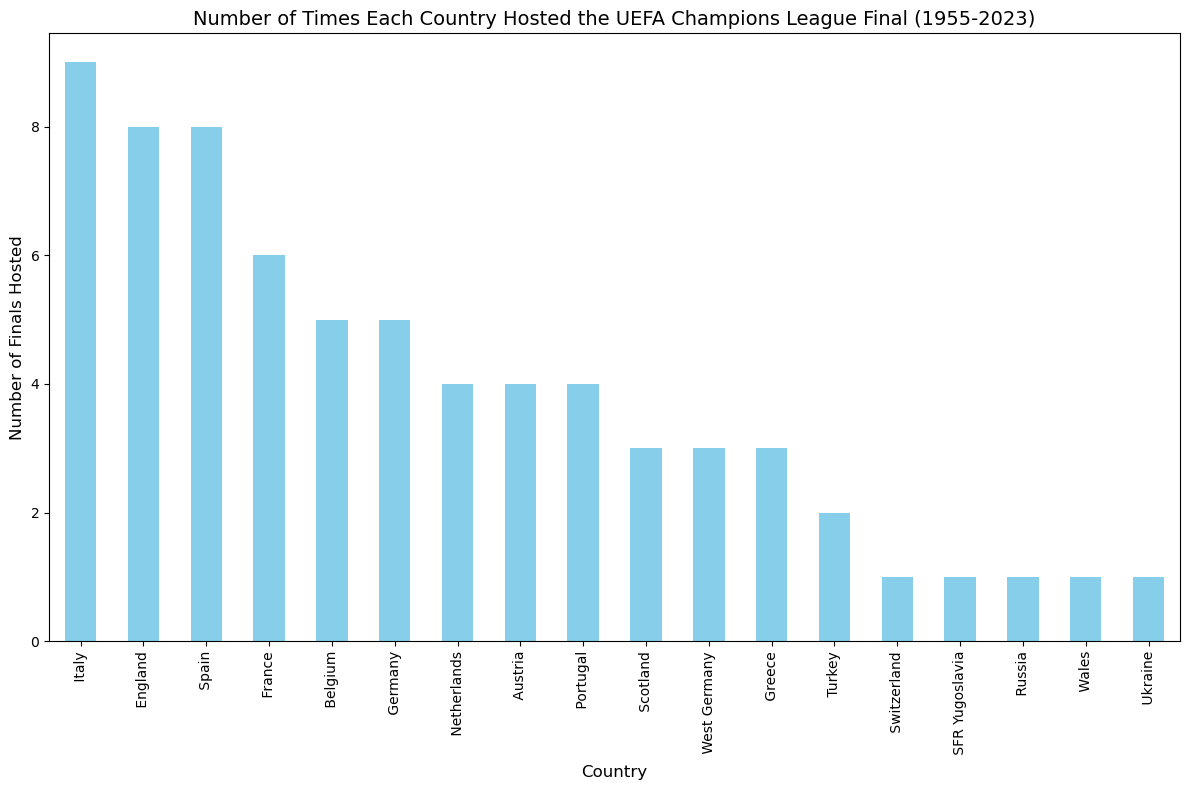

In [89]:
# Plot the histogram
plt.figure(figsize=(12, 8))
venue_character_counts.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Number of Times Each Country Hosted the UEFA Champions League Final (1955-2023)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Finals Hosted', fontsize=12)
plt.xticks(rotation=90)  # Rotate country names for better readability
plt.tight_layout()  # Adjust the layout to prevent overlap